In [2]:
import pandas as pd
#load Pandas for data structures and operations for manipulating numerical tables and time series.
import numpy as np
#Load NumPy for linear algebra/ Numerical Python
data = pd.read_csv ('policey_bern.csv')

print (data)

#loading the data from the .csv-file
# having an overview of the columns (and number of rows)

# Important: in Policey_bern are the UNIQUE laws per date available. These are 4932 laws. 
# However, these laws have a lot of 'matters' within one cel. 

                LawID  URI LegislatorID  \
0     BER.01.001.4968  NaN   BER.01.001   
1     BER.01.001.0001  NaN   BER.01.001   
2     BER.01.001.0002  NaN   BER.01.001   
3     BER.01.001.0003  NaN   BER.01.001   
4     BER.01.001.0004  NaN   BER.01.001   
...               ...  ...          ...   
4927  BER.01.001.4832  NaN   BER.01.001   
4928  BER.01.001.4833  NaN   BER.01.001   
4929  BER.01.001.4834  NaN   BER.01.001   
4930  BER.01.001.4835  NaN   BER.01.001   
4931  BER.01.001.4836  NaN   BER.01.001   

                                         LegislatorName  LegislatorTitle  \
0     Schultheiß und Kleiner und Großer Rat der Stad...              NaN   
1     Schultheiß und Kleiner und Großer Rat der Stad...              NaN   
2     Schultheiß und Kleiner und Großer Rat der Stad...              NaN   
3     Schultheiß und Kleiner und Großer Rat der Stad...              NaN   
4     Schultheiß und Kleiner und Großer Rat der Stad...              NaN   
...                        

In [3]:
data.info()
# Information what is included in the .csv
# This incl. which columns, how much information and type of data is available in these columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7566 entries, 0 to 7565
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   LawID                7566 non-null   object 
 1   SubLawID             7566 non-null   object 
 2   CategoryNumber       7566 non-null   float64
 3   MainCategory         7566 non-null   object 
 4   SecondaryCategory    7566 non-null   object 
 5   SubCategories        7506 non-null   object 
 6   URI                  0 non-null      float64
 7   LegislatorID         7566 non-null   object 
 8   LegislatorName       7566 non-null   object 
 9   LegislatorTitle      0 non-null      float64
 10  LegislatorReligion   7566 non-null   object 
 11  LegislatorRuleBegin  7566 non-null   int64  
 12  LegislatorRuleEnd    7566 non-null   int64  
 13  TerID                7566 non-null   object 
 14  TerShortLabel        7566 non-null   object 
 15  TerSeq               7566 non-null   i

In [4]:
print (data.columns)
#short index overview of what is included in the columns (column-names)

Index(['LawID', 'SubLawID', 'CategoryNumber', 'MainCategory',
       'SecondaryCategory', 'SubCategories', 'URI', 'LegislatorID',
       'LegislatorName', 'LegislatorTitle', 'LegislatorReligion',
       'LegislatorRuleBegin', 'LegislatorRuleEnd', 'TerID', 'TerShortLabel',
       'TerSeq', 'TerLabel', 'TerOrg', 'TerOrgID', 'TerType1', 'TerType2',
       'TerReligion', 'TerDistrict', 'TerPublished', 'TerEditor', 'TerLitList',
       'TerAbbrevList', 'TerPreface', 'Datum', 'Date1', 'Date', 'Year',
       'Month', 'Day', 'Form', 'Scope', 'RelatesTo', 'Publication', 'Archive',
       'Title', 'Facs', 'URL', 'Matters', 'Dirty', 'Controlled', 'Links'],
      dtype='object')


In [4]:
# I need the column 'Year' because I want to make a bar graph or a line graph (a table would be nice too).
# I need these years to be staked on top of each other (so all the 1536 examples of laws need to be on top of each other)
# The x-as shows all the years.
# The y-as shows the amount.

In [5]:
# I need the column 'Matters'
# This column contains an enormous amount of data, which needs to be seperated(?).
# In this column's cells, the ordinances are categorised. Each topic has a number in accordance with:https://policey.rg.mpg.de/web/assets/03_systematik_index_policeymaterien.pdf 
# In these 'matters'-cells several topics (or just one) are listed as e.g. 1.3 marginalised groups (Randgruppen) followed by several subcategories.
# Within this example 1.3; 1.3 is a subordinate to 1. 
# So, 1.3, Randgruppen is followed by ",," and then the subgroup follows.
# After the subgroup (that can consist of multiple words) the real specification follows, each seems to be separated by ';'.
# Each of the "main-subcategories" seems to be organised by ( ) which starts with the geographical area (BER.01.001.xxxx)

In [6]:
# I want to select everything that is either starting with matters 1 or 2 (but the other's I like to use for graphs too)
# I want to create line-graphs that show the different topics within "1" (public order) or "2" (social order)
# Aim: to show the development over time of these topics.


In [7]:
df = pd.read_csv('policey_bern.csv', index_col=0)
#the index_col parameter to select the first column of data as the index
df

,URI,LegislatorID,LegislatorName,LegislatorTitle,LegislatorReligion,LegislatorRuleBegin,LegislatorRuleEnd,TerID,TerShortLabel,TerSeq,...,RelatesTo,Publication,Archive,Title,Facs,URL,Matters,Dirty,Controlled,Links
LawID,,,,,,,,,,,,,,,,,,,,,
BER.01.001.4968,NaN,BER.01.001,Schultheiß und Kleiner und Großer Rat der Stad...,NaN,EV,1528,1798,BER,BER,1,...,NaN,NaN,"StAB, A I 480, S. 231",Verpott in der Statt Wäldenn khein Holz zefellen.,NaN,NaN,"(BER.01.001.4968.06412.0,,4.2,Forst- und Boden...",NaN,NaN,NaN
BER.01.001.0001,NaN,BER.01.001,Schultheiß und Kleiner und Großer Rat der Stad...,NaN,EV,1528,1798,BER,BER,1,...,NaN,NaN,"StAB, A I 479, fol. 1v-10v",NaN,NaN,NaN,"(BER.01.001.0001.00001.0,,1.1,Religionsangeleg...",NaN,NaN,NaN
BER.01.001.0002,NaN,BER.01.001,Schultheiß und Kleiner und Großer Rat der Stad...,NaN,EV,1528,1798,BER,BER,1,...,NaN,NaN,"StAB, A I 479, fol. 11r-13v",Ordnung der Jarzyten unnd Liechternn ouch annd...,NaN,NaN,"(BER.01.001.0002.00009.0,,1.1,Religionsangeleg...",NaN,NaN,NaN
BER.01.001.0003,NaN,BER.01.001,Schultheiß und Kleiner und Großer Rat der Stad...,NaN,EV,1528,1798,BER,BER,1,...,NaN,NaN,"StAB, A I 479, fol. 13v-14r",NaN,NaN,NaN,"(BER.01.001.0003.00010.0,,1.1,Religionsangeleg...",NaN,NaN,NaN
BER.01.001.0004,NaN,BER.01.001,Schultheiß und Kleiner und Großer Rat der Stad...,NaN,EV,1528,1798,BER,BER,1,...,NaN,NaN,"StAB, A I 479, fol. 14v-15v",Erste Ordnung der Fyrtagenn.,NaN,NaN,"(BER.01.001.0004.00011.0,,1.1,Religionsangeleg...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BER.01.001.4832,NaN,BER.01.001,Schultheiß und Kleiner und Großer Rat der Stad...,NaN,EV,1528,1798,BER,BER,1,...,NaN,NaN,"StAB, A I 513, S. 582-584",Der freye Getreid Ankauf auf allen Jahr und Wo...,NaN,NaN,"(BER.01.001.4832.06175.1,,4.6,Handel und Diens...",NaN,NaN,NaN
BER.01.001.4833,NaN,BER.01.001,Schultheiß und Kleiner und Großer Rat der Stad...,NaN,EV,1528,1798,BER,BER,1,...,NaN,NaN,"StAB, A I 513, S. 610 f.",Das Tragen der französischen Ordenszeichen [.....,NaN,NaN,"(BER.01.001.4833.06176.0,,1.4,Aufwand und Luxu...",NaN,NaN,NaN
BER.01.001.4834,NaN,BER.01.001,Schultheiß und Kleiner und Großer Rat der Stad...,NaN,EV,1528,1798,BER,BER,1,...,NaN,NaN,"StAB, A I 514, S. 7-10","Das Journal, [...] zur Geschichte des Standes ...",NaN,NaN,"(BER.01.001.4834.06177.0,,2.3,Zensur und Buchd...",NaN,NaN,NaN


In [43]:
df ['Year']

LawID
BER.01.001.4968    1528
BER.01.001.0001    1528
BER.01.001.0002    1528
BER.01.001.0003    1528
BER.01.001.0004    1528
                   ... 
BER.01.001.4832    1797
BER.01.001.4833    1797
BER.01.001.4834    1797
BER.01.001.4835    1798
BER.01.001.4836    1798
Name: Year, Length: 4932, dtype: int64

<AxesSubplot:>

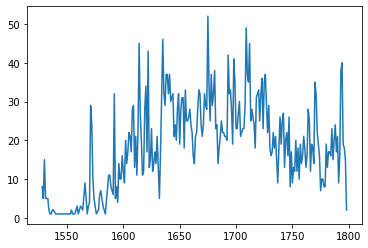

In [49]:
series = df['Year'].value_counts()
series = series.sort_index()
series.plot.line()

# pandas count distinct values in column

In [47]:
type( df['Year'].value_counts())

pandas.core.series.Series

In [50]:
df ['Matters']

LawID
BER.01.001.4968    (BER.01.001.4968.06412.0,,4.2,Forst- und Boden...
BER.01.001.0001    (BER.01.001.0001.00001.0,,1.1,Religionsangeleg...
BER.01.001.0002    (BER.01.001.0002.00009.0,,1.1,Religionsangeleg...
BER.01.001.0003    (BER.01.001.0003.00010.0,,1.1,Religionsangeleg...
BER.01.001.0004    (BER.01.001.0004.00011.0,,1.1,Religionsangeleg...
                                         ...                        
BER.01.001.4832    (BER.01.001.4832.06175.1,,4.6,Handel und Diens...
BER.01.001.4833    (BER.01.001.4833.06176.0,,1.4,Aufwand und Luxu...
BER.01.001.4834    (BER.01.001.4834.06177.0,,2.3,Zensur und Buchd...
BER.01.001.4835    (BER.01.001.4835.06178.0,,4.6,Handel und Diens...
BER.01.001.4836    (BER.01.001.4836.06179.0,,2.3,Zensur und Buchd...
Name: Matters, Length: 4932, dtype: object

In [12]:
bern = (
    pd.read_csv('policey_bern.csv')
    .rename(str.lower, axis='columns')
)
bern.head()

,lawid,uri,legislatorid,legislatorname,legislatortitle,legislatorreligion,legislatorrulebegin,legislatorruleend,terid,tershortlabel,...,relatesto,publication,archive,title,facs,url,matters,dirty,controlled,links
0,BER.01.001.4968,NaN,BER.01.001,Schultheiß und Kleiner und Großer Rat der Stad...,NaN,EV,1528,1798,BER,BER,...,NaN,NaN,"StAB, A I 480, S. 231",Verpott in der Statt Wäldenn khein Holz zefellen.,NaN,NaN,"(BER.01.001.4968.06412.0,,4.2,Forst- und Boden...",NaN,NaN,NaN
1,BER.01.001.0001,NaN,BER.01.001,Schultheiß und Kleiner und Großer Rat der Stad...,NaN,EV,1528,1798,BER,BER,...,NaN,NaN,"StAB, A I 479, fol. 1v-10v",NaN,NaN,NaN,"(BER.01.001.0001.00001.0,,1.1,Religionsangeleg...",NaN,NaN,NaN
2,BER.01.001.0002,NaN,BER.01.001,Schultheiß und Kleiner und Großer Rat der Stad...,NaN,EV,1528,1798,BER,BER,...,NaN,NaN,"StAB, A I 479, fol. 11r-13v",Ordnung der Jarzyten unnd Liechternn ouch annd...,NaN,NaN,"(BER.01.001.0002.00009.0,,1.1,Religionsangeleg...",NaN,NaN,NaN
3,BER.01.001.0003,NaN,BER.01.001,Schultheiß und Kleiner und Großer Rat der Stad...,NaN,EV,1528,1798,BER,BER,...,NaN,NaN,"StAB, A I 479, fol. 13v-14r",NaN,NaN,NaN,"(BER.01.001.0003.00010.0,,1.1,Religionsangeleg...",NaN,NaN,NaN
4,BER.01.001.0004,NaN,BER.01.001,Schultheiß und Kleiner und Großer Rat der Stad...,NaN,EV,1528,1798,BER,BER,...,NaN,NaN,"StAB, A I 479, fol. 14v-15v",Erste Ordnung der Fyrtagenn.,NaN,NaN,"(BER.01.001.0004.00011.0,,1.1,Religionsangeleg...",NaN,NaN,NaN


In [14]:
df = pd.DataFrame('matters')
df


ValueError: DataFrame constructor not properly called!

In [ ]:

df[['First','Last']] = df.Name.str.split("_",expand=True,)
df

In [15]:
data= pd.read_csv('policey_bern.csv')
df = data.iloc[:,0].str.split(';', expand=True)
df.columns = data.columns[0].split('; ')
print (df)

                LawID
0     BER.01.001.4968
1     BER.01.001.0001
2     BER.01.001.0002
3     BER.01.001.0003
4     BER.01.001.0004
...               ...
4927  BER.01.001.4832
4928  BER.01.001.4833
4929  BER.01.001.4834
4930  BER.01.001.4835
4931  BER.01.001.4836

[4932 rows x 1 columns]


In [23]:
# new data frame with split value columns
new = data["matters"].str.split .split( ')(' , n = 1, expand = True)
  
# making separate first name column from new data frame
data["matters1"]= new[0]
  
# making separate last name column from new data frame
data["matters2"]= new[1]
  
  
# df display
data

KeyError: 'matters'

In [21]:
def bracketed_split(string, delimiter, strip_brackets=False):
    """ Split a string by the delimiter unless it is inside brackets.
    e.g. list(bracketed_split('abc,(def,ghi),jkl', delimiter=',')) == ['abc', '(def,ghi)', 'jkl'] """

    openers = '[{(<'
    closers = ']})>'
    opener_to_closer = dict(zip(openers, closers))
    opening_bracket = dict()
    current_string = ''
    depth = 0
    for c in string:
        if c in openers:
            depth += 1
            opening_bracket[depth] = c
            if strip_brackets and depth == 1:
                continue
        elif c in closers:
            assert depth > 0, f"You exited more brackets that we have entered in string {string}"
            assert c == opener_to_closer[opening_bracket[depth]], f"Closing bracket {c} did not match opening bracket {opening_bracket[depth]} in string {string}"
            depth -= 1
            if strip_brackets and depth == 0:
                continue
        if depth == 0 and c == delimiter:
            yield current_string
            current_string = ''
        else:
            current_string += c
    assert depth == 0, f'You did not close all brackets in string {string}'
    yield current_string

In [19]:
>>> list(bracketed_split("[Hi all], [this is] [an example]", delimiter=' '))
['[Hi all],', '[this is]', '[an example]']

>>> list(bracketed_split("[Hi all], [this is] [a [nested] example]", delimiter=' '))
['[Hi all],', '[this is]', '[a [nested] example]']

['[Hi all],', '[this is]', '[a [nested] example]']

In [22]:
new = data["matters"].str.split(opener_to_closer)

KeyError: 'matters'

In [ ]:
#How to save an image

import matplotlib.pyplot as plt 

fig, ax = plt.subplots()

df.plot(x = 'Stock_Index_Price', y = 'Unemployment_Rate', kind =  'scatter', ax=ax);
# check the names of the axes and type of the graph
fig.savefig('name.png')

In [ ]:
(
    chickweight
    .groupby('diet') #groupby finds similar groups by itself
    ['weight']
    .mean()
)

In [24]:
import pandas as pd
#load Pandas for data structures and operations for manipulating numerical tables and time series.
import numpy as np
#Load NumPy for linear algebra/ Numerical Python
data = pd.read_csv ('bern_test.csv')

print (data)


     Unnamed: 0            LawID                 SubLawID  CategoryNumber  \
0             0  BER.01.001.4968  BER.01.001.4968.06412.0             4.2   
1             1  BER.01.001.0001  BER.01.001.0001.00001.0             1.1   
2             2  BER.01.001.0001  BER.01.001.0001.00004.0             1.1   
3             3  BER.01.001.0001  BER.01.001.0001.00002.0             1.1   
4             4  BER.01.001.0001  BER.01.001.0001.00006.0             1.1   
..          ...              ...                      ...             ...   
505         505  BER.01.001.4849  BER.01.001.4849.06193.0             1.5   
506         506  BER.01.001.0264  BER.01.001.0264.00447.0             3.1   
507         507  BER.01.001.0266  BER.01.001.0266.00449.0             3.1   
508         508  BER.01.001.0226  BER.01.001.0226.00402.0             3.2   
509         509  BER.01.001.0267  BER.01.001.0267.00450.0             4.6   

                                   MainCategory      SecondaryCategory  \
0

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         510 non-null    int64  
 1   LawID              510 non-null    object 
 2   SubLawID           510 non-null    object 
 3   CategoryNumber     508 non-null    float64
 4   MainCategory       508 non-null    object 
 5   SecondaryCategory  508 non-null    object 
 6   SubCategories      494 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 18.0+ KB


In [35]:
bern = (
    pd.read_csv('bern_test.csv') 
      .rename(str.lower, axis='columns')
)
bern

,unnamed: 0,lawid,sublawid,categorynumber,maincategory,secondarycategory,subcategories
0,0,BER.01.001.4968,BER.01.001.4968.06412.0,4.2,Forst- und Bodennutzung,Forst,"Forstfrevel,Kein näheres Datum"
1,1,BER.01.001.0001,BER.01.001.0001.00001.0,1.1,Religionsangelegenheiten,Geistlichkeit,Amtsausübung; Amtsführung; Predigt; Aufsicht; ...
2,2,BER.01.001.0001,BER.01.001.0001.00004.0,1.1,Religionsangelegenheiten,Kirchenzucht,Fasten; Toleranz; Messe
3,3,BER.01.001.0001,BER.01.001.0001.00002.0,1.1,Religionsangelegenheiten,Kirchenorganisation,Pfarrstellenbesetzung; Abgaben; Vermögen; Stif...
4,4,BER.01.001.0001,BER.01.001.0001.00006.0,1.1,Religionsangelegenheiten,Klosterwesen/Orden,Verbot; Austritt; Bruderschaft
...,...,...,...,...,...,...,...
505,505,BER.01.001.4849,BER.01.001.4849.06193.0,1.5,Sittlichkeit; Ehe- und Familie; Sexualität,Eheschließung,Eheschließung; Vermittlung; Mißbrauch
506,506,BER.01.001.0264,BER.01.001.0264.00447.0,3.1,Gesundheitswesen,Seuchen,Quarantäne
507,507,BER.01.001.0266,BER.01.001.0266.00449.0,3.1,Gesundheitswesen,Seuchen,Quarantäne
508,508,BER.01.001.0226,BER.01.001.0226.00402.0,3.2,Sozialwesen,Armenwesen,Almosenverteilung; Almosensammeln; Milde Stift...


In [27]:
bern [['categorynumber']]

,categorynumber
0,4.2
1,1.1
2,1.1
3,1.1
4,1.1
...,...
505,1.5
506,3.1
507,3.1
508,3.2


In [30]:
bern
'categorynumber'.value_counts()


# pandas count distinct values in column

AttributeError: 'str' object has no attribute 'value_counts'

In [31]:
bern.groupby('categorynumber')

In [36]:
(
bern
    .loc[bern['categorynumber']]
    .value_counts
)

KeyError: "None of [Float64Index([4.2, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 2.1, 2.3, 1.1,\n              ...\n              2.2, 2.4, 4.6, 4.6, 4.6, 1.5, 3.1, 3.1, 3.2, 4.6],\n             dtype='float64', length=510)] are in the [index]"